<a href="https://colab.research.google.com/github/Mark-Kinyua/compiler_construction/blob/main/compiler_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ICS 4C**

Student Details: 

1. Mark Muriithi - 112058
2. John Munene - 113522
3. Ishaq Kassam - 120353
4. Kevin Manoti - 121184
5. Bryan Kiplangat - 110204

https://docs.google.com/document/d/1laK_Hpzd9vaICDTyStx0BLjiqcjTL0YV3_V2B8FL30M/edit

**Compiler Construction Lab**

Lab 1

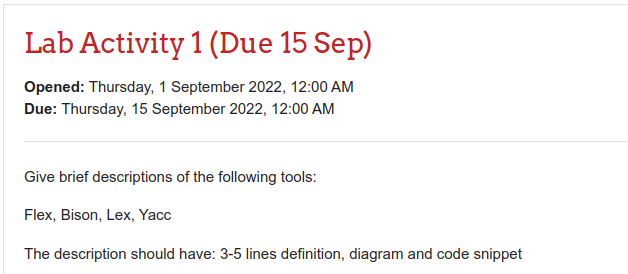

***Flex*** (Mark)


Flex (Fast Lexical Analyser generator) is a tool/computer program for generating lexical analyzers (scanner or lexers). It is used together with Berkeley Yacc parser generator or GNU Bison parser generator. Flex and Bison are more flexible than Lex and Yacc and produces faster code.
Given image describes how Flex is used:




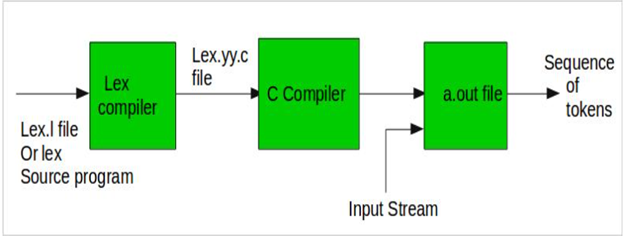

**Step 1**: An input file describes the lexical analyzer to be generated named lex.l is written in lex language. The lex compiler transforms lex.l to C program, in a file that is always names lex.yy.c

**Step 2**: The C compiler lex.yy.c file into an executable file called a.out

**Step 3**: The output file a.out take a stream of input characters and produces a stream of tokens

***Code Example***

The below code is meant to count the number of characters in a string.
It is written in C.

Definition Section has one variable
which can be accessed inside yylex() 
and main()
```
%{
int count = 0;
%}
``` 
Rule Section has three rules, first rule 
matches with capital letters, second rule
matches with any character except newline and 
third rule does not take input after the enter
```
%%
[A-Z] {printf("%s capital letter\n", yytext);
       count++;}

. 	{printf("%s not a capital letter\n", yytext);}
\n	
{return 0;}
%%
  ```
Code Section prints the number of
capital letter present in the given input
```
int yywrap(){}
int main(){
  
// Explanation:
// yywrap() - wraps the above rule section

/* yyin - takes the file pointer which contains the input*/

/* yylex() - this is the main flex function
          which runs the Rule Section*/

// yytext is the text in the buffer

  
// Uncomment the lines below 

// to take input from file

// FILE *fp;

// char filename[50];

// printf("Enter the filename: \n");

// scanf("%s",filename);

// fp = fopen(filename,"r");

// yyin = fp;
  
yylex();

printf("\nNumber of Capital letters " "

in the given input - %d\n", count);
  
return 0;
}
 ```
 


# OUTPUT

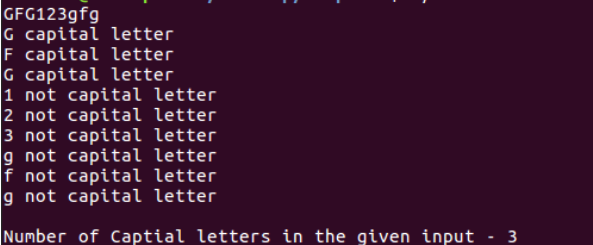


**BISON**

Bison is a parser generator, it is to parsers what flex is to scanners (Pyster, 1988). 

Bison is designed for use with C code and generates a parser written in C (Pyster, 1988).


**How it works**

You provide a grammar specification file, which is traditionally named using a .y extension. You invoke bison on the .y file and  it creates the y.tab.h file and y.tab.c files containing a thousand or so lines of intense C code that implements an efficient LALR(1) parser for your grammar, including the code for actions you specified (Pyster, 1988).

The file provides an extern function yyparse.y that will attempt to successfully parse a valid sentence. You compile that C file normally, link with the rest of your code and you have a parser. By default the parser reads from stdin and writes to stdout, just like a flex generated scanner does (Levine,1992).



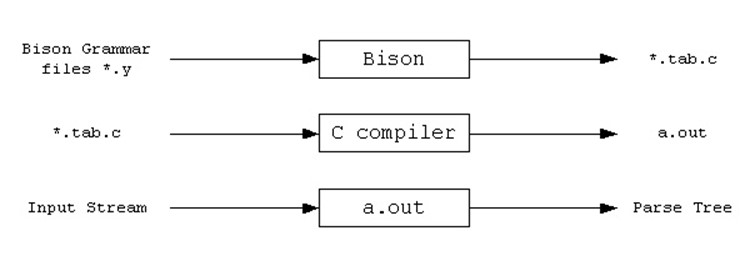

**Bison File Format**

Your input file in Bison is organized as follows:

```
%{ 

Declarations

 %} 

Definitions 

%% 

Productions

 %%
 ```

 User subroutines

The optional declarations and User subroutines sections are used for ordinary C code that you want copied verbatim to the generated C file, declarations are copied to the top of the file, user subroutines to the bottom.

 The optional  Definitions section is where you configure various parser features such as defining token codes, establishing operator precedence and associativity, and setting up the global variables used to communicate between the scanner and the parser.

The required productions section is where you specify the grammar rules

**Example**

Below is a bison input file for a simple calculator that recognizes and evaluates binary postfix expressions using a stack
```
%{ 
  #include <stdio.h>
  #include <assert.h>

static int Pop(); 

static int Top();

static void Push(int val); 

%}

%token T_Int 

%% 
%% 

S : S E '\n' { printf("= %d\n", Top()); }

   |

   ;

E : E E '+' { Push(Pop() + Pop()); }

| E E '-' { int op2 = Pop(); Push(Pop() - op2); }

| E E '*' { Push(Pop() * Pop()); }

| E E '/' { int op2 = Pop(); Push(Pop() / op2); }

| T_Int { Push(yylval); }

    ;

%%

static int stack[100], count = 0; 

static int Pop() { 

assert(count > 0); 

return stack[--count]; 

} 

static int Top() { 

   assert(count > 0); 
   return stack[count-1]; 

} 

static void Push(int val) { 

assert(count < sizeof(stack)/sizeof(*stack)); 


stack[count++] = val; 

} 

int main() {

return yyparse(); 

}
```


***Lex***

Lex, an acronym that stands for ‘Lexical Analyzer Generator’, is a program designed to generate scanners, also known as tokenizers, which recognize lexical patterns in text (TechTarget, 2007). A lex program is separated into three sections by %% delimiters as shown below: (Javapoint, 2022)

```
{ definitions }   //include declarations of constant, variable and regular definitions
%%  
 { rules }   //define the statement of form p1{action1} p2{action2}...pn{action}
%%   
{ user subroutines }  //are auxiliary procedures needed by the actions
```


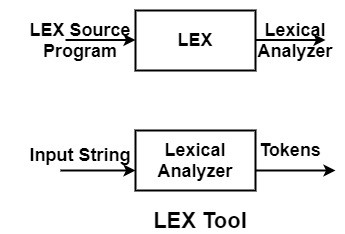

***Yacc***

A tool that generates a parser / syntax analyser from a grammar and describes this input to a computer program. (YACC - Javatpoint)

YACC takes an input of a context free grammar, written in a .y file, compiles it and produces the source code of the syntactic analyser of the language from the given grammar.
(Johnson)


Below is a simple yacc sentence parser

```
%{
 /*
 * A lexer for the basic grammar to use for recognizing English sentences. 
*/


 #include <stdio.h>
%}

%token NOUN PRONOUN VERB ADVERB ADJECTIVE PREPOSITION CONJUNCTION

%%
sentence: subject VERB object{ printf("Sentence is valid.\n"); }
;

subject:  	NOUN

     | 	PRONOUN ;

object: 		NOUN;

%%

extern FILE *yyin;
main()
{

do

{

   yyparse();

     }

while (!feof(yyin));

}

yyerror(s) 

char *s;

{

 fprintf(stderr, "%s\n", s); 

}
```


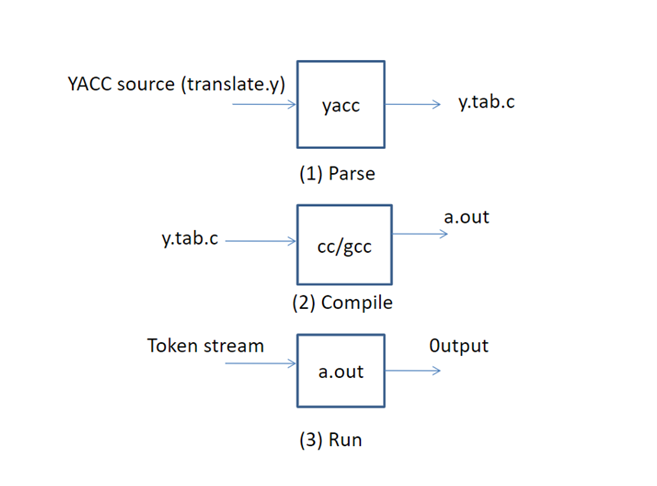

***References***

  TechTarget. 2007. Lex (lexical analyzer generator). Retrieved from https://www.techtarget.com/whatis/definition/Lex-lexical-analyzer-generator

  Javapoint. 2022. LEX. Retrieved from https://www.javatpoint.com/lex

  Bison Tutorial. (n.d.). Retrieved September 5, 2022, from http://alumni.cs.ucr.edu/%7Elgao/teaching/bison.html#parser

  Pyster, A., Compiler Design and Construction. New York, NY: Van Nostrand Reinhold, 1988.

  Levine, J., Mason, T. & Brown, D., Lex and Yacc. Sebastopol, CA: O’Reilly & Associates, 1992.
  
  Johnson, S. (n.d.). Yacc: Yet Another Compiler-Compiler. Retrieved 6 September 2022, from http://dinosaur.compilertools.net/yacc/index.html
  
  YACC - javatpoint. (n.d.). Retrieved 6 September 2022, from https://www.javatpoint.com/yacc


**LAB 2**